In [1]:
# Load modules

import xarray as xr
import pandas as pd
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import zarr
import gcsfs
import xesmf as xe
from scipy.interpolate import griddata
from xmip.preprocessing import rename_cmip6
from mpl_toolkits.axes_grid1 import ImageGrid
from matplotlib import gridspec
import matplotlib

In [2]:
toa_control = xr.open_dataarray('/data/keeling/a/mailes2/a/processed_var_data/CMIP_toa_piControl_2x2.nc')
toa_control.load()

toa_hist = xr.open_dataarray('/data/keeling/a/mailes2/a/processed_var_data/CMIP_toa_historical_2x2.nc')
toa_hist.load()

surface_control = xr.open_dataarray('/data/keeling/a/mailes2/a/processed_var_data/CMIP_surface_piControl_interp_extend.nc')
surface_control.load()

surface_hist = xr.open_dataarray('/data/keeling/a/mailes2/a/processed_var_data/CMIP_surface_hist_interp_extend.nc')
surface_hist.load()

horiz_control = xr.open_dataarray('/data/keeling/a/mailes2/a/processed_var_data/CMIP_horiz_piControl_2x2.nc')
horiz_control.load()

horiz_hist = xr.open_dataarray('/data/keeling/a/mailes2/a/processed_var_data/CMIP_horiz_hist_2x2.nc')
horiz_hist.load()

ocean_control = xr.open_dataarray('/data/keeling/a/mailes2/a/processed_var_data/ocean_flux_control.nc')
ocean_control.load()

ocean_hist = xr.open_dataarray('/data/keeling/a/mailes2/a/processed_var_data/ocean_flux_hist.nc')
ocean_hist.load()

<xarray.DataArray (time: 1500, name: 9, lat: 88, lon: 179)>
array([[[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         ...,
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

        [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
...
         [-3.72364370e+02, -3.37570938e+02, -3.06830281e+02, ...,
          -3.69938915e+02, -3.85069090e+02, -3.95843422e+02],
         [-4.37391899e+02, -4.54188880e+02, -4.75115781e+02, ...,
          -3.75813212e+02, -3.89887374e+02, -4.07088913e+02],
         [-5.37353071e+02, -5.50264027e+02, -5.60677242e+02, ...,
          -4.82230126e+02, -4.95818456e+02, -5.10975769e+02]],

        [[-7.15127588e+00, -7.17544508e+00, -7.19953938e+00, ...,
          -7.01900230e+00, -7.05338505e+00, -7.08768180e+00],
         [-7.09303928e+00, -7.18291887e+00, -7.27283770e+00, ...,
          -6.71072006e+00, -6.79742267e+00, -6.89763858e+00],
         [-7.05300527e+00, -7.17045711e+00, -7.28742816e+00, ...,
          -6.54804259e+00, -6.66815613e+00, -6.79860768e+00],
         ...,
         [-1.61308705e+02, -1.44592885e+02, -1.34413314e+02, ...,
          -1.94769770e+02, -1.96659352e+02, -1.88590153e+02],
         [-1.06022143e+02, -9.88412029e+01, -9.27617527e+01, ...,
          -1.39612776e+02, -1.31027969e+02, -1.22683649e+02],
         [-3.96241346e+01, -3.84842441e+01, -3.72494463e+01, ...,
          -4.81284316e+01, -4.57977274e+01, -4.35754286e+01]]]])
Coordinates:
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * time     (time) datetime64[ns] 1851-01-31 1851-02-28 ... 1975-12-31
  * name     (name) object 'IPSL-CM6A-LR' 'GISS-E2-1-G' ... 'EC-Earth3'

In [2]:
rlut_control = xr.open_dataarray('/data/keeling/a/mailes2/a/processed_var_data/CMIP_rlut_piControl_2x2.nc')
rlut_control.load()

rsut_control = xr.open_dataarray('/data/keeling/a/mailes2/a/processed_var_data/CMIP_rsut_piControl_2x2.nc')
rsut_control.load()

rsdt_control = xr.open_dataarray('/data/keeling/a/mailes2/a/processed_var_data/CMIP_rsdt_piControl_2x2.nc')
rsdt_control.load()

<xarray.DataArray 'rsdt' (name: 26, time: 1800, lat: 88, lon: 179)>
array([[[[4.95630878e+02, 4.95630878e+02, 4.95630878e+02, ...,
          4.95630878e+02, 4.95630878e+02, 4.95630878e+02],
         [4.94403610e+02, 4.94403610e+02, 4.94403610e+02, ...,
          4.94403610e+02, 4.94403610e+02, 4.94403610e+02],
         [4.92611630e+02, 4.92611630e+02, 4.92611630e+02, ...,
          4.92611630e+02, 4.92611630e+02, 4.92611630e+02],
         ...,
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

        [[3.07310748e+02, 3.07310748e+02, 3.07310748e+02, ...,
          3.07310748e+02, 3.07310748e+02, 3.07310748e+02],
         [3.06549805e+02, 3.06549805e+02, 3.06549805e+02, ...,
          3.06549805e+02, 3.06549805e+02, 3.06549805e+02],
         [3.05439200e+02, 3.05439200e+02, 3.05439200e+02, ...,
          3.05439200e+02, 3.05439200e+02, 3.05439200e+02],
...
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

        [[5.48240228e+02, 5.48240228e+02, 5.48240228e+02, ...,
          5.48240228e+02, 5.48240228e+02, 5.48240228e+02],
         [5.46882660e+02, 5.46882660e+02, 5.46882660e+02, ...,
          5.46882660e+02, 5.46882660e+02, 5.46882660e+02],
         [5.44900488e+02, 5.44900488e+02, 5.44900488e+02, ...,
          5.44900488e+02, 5.44900488e+02, 5.44900488e+02],
         ...,
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00]]]])
Coordinates:
  * time     (time) datetime64[ns] 1851-01-31 1851-02-28 ... 2000-12-31
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
  * name     (name) object 'ACCESS-CM2/piControl/r1i1p1f1/rsdt_Amon_ACCESS-CM...
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    comment:        Shortwave radiation incident at the top of the atmosphere
    history:        2019-11-12T01:26:21Z altered by CMOR: replaced missing va...
    long_name:      TOA Incident Shortwave Radiation
    standard_name:  toa_incoming_shortwave_flux
    units:          W m-2

In [16]:
new_name = np.arange(0,23)

rsdt_control = rsdt_control.isel(name=slice(0,23)).assign_coords(name=new_name)
rsut_control = rsut_control.isel(name=slice(0,23)).assign_coords(name=new_name)
rlut_control = rlut_control.isel(name=slice(0,23)).assign_coords(name=new_name)

In [3]:
toa_control_rolling = toa_control.rolling(time=300, center=True).mean('time')
toa_control_std = toa_control_rolling.std('time')
toa_control_std = toa_control_std.mean('name')
toa_control_std

<xarray.DataArray (lat: 88, lon: 179)>
array([[0.26846979, 0.26293638, 0.27373995, ..., 0.27424192, 0.26593372,
        0.26574528],
       [0.28648036, 0.38240986, 0.31425372, ..., 0.27871514, 0.28378227,
        0.28018114],
       [0.29038203, 0.37219252, 0.39431358, ..., 0.29604332, 0.29722105,
        0.295214  ],
       ...,
       [0.48143819, 0.47593762, 0.46582829, ..., 0.50349555, 0.4963191 ,
        0.48547999],
       [0.44110632, 0.43010165, 0.42924318, ..., 0.43709659, 0.43286914,
        0.4312917 ],
       [0.42288559, 0.40697024, 0.40495861, ..., 0.41991885, 0.41576788,
        0.4128346 ]])
Coordinates:
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357

In [4]:
toa_hist_rolling = toa_hist.rolling(time=300, center=True).mean('time')
toa_hist_std = toa_hist_rolling.std('time')
toa_hist_std = toa_hist_std.mean('name')
toa_hist_std

<xarray.DataArray (lat: 88, lon: 179)>
array([[0.38154373, 0.3785775 , 0.37839169, ..., 0.37423723, 0.37774285,
        0.38142801],
       [0.38734469, 0.39150155, 0.39137846, ..., 0.3758116 , 0.37763313,
        0.37603919],
       [0.52345259, 0.54545704, 0.39965721, ..., 0.36546286, 0.36973755,
        0.36998674],
       ...,
       [0.49306055, 0.49796601, 0.49715678, ..., 0.50319228, 0.50565967,
        0.50320484],
       [0.49391083, 0.49455695, 0.49426506, ..., 0.49900238, 0.49704061,
        0.49233069],
       [0.49186864, 0.49596992, 0.49745654, ..., 0.50056497, 0.49980833,
        0.49767624]])
Coordinates:
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357

In [5]:
surface_control_rolling = surface_control.rolling(time=300, center=True).mean('time')
surface_control_std = surface_control_rolling.std('time')
surface_control_std = surface_control_std.mean('name')
surface_control_std

<xarray.DataArray (lat: 88, lon: 179)>
array([[0.01836389, 0.01813971, 0.01808476, ..., 0.01727361, 0.01790143,
        0.01810834],
       [0.02249858, 0.01893194, 0.01956022, ..., 0.02148737, 0.02134031,
        0.02162853],
       [0.02172777, 0.01975097, 0.01945565, ..., 0.02047142, 0.02050141,
        0.02065908],
       ...,
       [0.45425423, 0.45827128, 0.46249394, ..., 0.41297378, 0.41776896,
        0.42541709],
       [0.42974712, 0.42179228, 0.41819731, ..., 0.40576141, 0.40919798,
        0.40936737],
       [0.41548264, 0.41148681, 0.40823896, ..., 0.41415713, 0.41434655,
        0.414533  ]])
Coordinates:
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357

In [6]:
surface_hist_rolling = surface_hist.rolling(time=300, center=True).mean('time')
surface_hist_std = surface_hist_rolling.std('time')
surface_hist_std = surface_hist_std.mean('name')
surface_hist_std

<xarray.DataArray (lat: 88, lon: 179)>
array([[0.02946796, 0.02857816, 0.02965797, ..., 0.02816688, 0.02658622,
        0.02701455],
       [0.02899053, 0.02881616, 0.02912446, ..., 0.02567701, 0.02597095,
        0.02655265],
       [0.03568076, 0.03282262, 0.03143027, ..., 0.03138262, 0.03124098,
        0.03083037],
       ...,
       [0.55760325, 0.56898779, 0.58607806, ..., 0.54282086, 0.53019359,
        0.52955809],
       [0.52169727, 0.51007817, 0.52014791, ..., 0.49789992, 0.50137566,
        0.50268403],
       [0.52749579, 0.51421682, 0.52127628, ..., 0.50513763, 0.50547054,
        0.5055137 ]])
Coordinates:
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357

In [7]:
horiz_control_rolling = horiz_control.rolling(time=300, center=True).mean('time')
horiz_control_std = horiz_control_rolling.std('time')
horiz_control_std = horiz_control_std.mean('name')
horiz_control_std

<xarray.DataArray (lat: 88, lon: 179)>
array([[0.289987  , 0.28110591, 0.2857243 , ..., 0.28494953, 0.27831637,
        0.28217041],
       [0.30014643, 0.40199498, 0.33320446, ..., 0.29607558, 0.30066443,
        0.29742415],
       [0.30013716, 0.37517673, 0.40158154, ..., 0.30515583, 0.30873363,
        0.31050857],
       ...,
       [0.59775534, 0.56931452, 0.57171423, ..., 0.54769377, 0.55610899,
        0.55765342],
       [0.58911474, 0.57210204, 0.57941714, ..., 0.54791055, 0.55103773,
        0.55227936],
       [0.58279097, 0.55962217, 0.56156018, ..., 0.5485863 , 0.55042519,
        0.55428892]])
Coordinates:
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357

In [8]:
horiz_hist_rolling = horiz_hist.rolling(time=300, center=True).mean('time')
horiz_hist_std = horiz_hist_rolling.std('time')
horiz_hist_std = horiz_hist_std.mean('name')
horiz_hist_std

<xarray.DataArray (lat: 88, lon: 179)>
array([[0.3667261 , 0.3668339 , 0.36541612, ..., 0.36386723, 0.36825428,
        0.37105131],
       [0.36978423, 0.37716853, 0.37344895, ..., 0.36380765, 0.36588814,
        0.3645099 ],
       [0.51415334, 0.53275708, 0.38857936, ..., 0.35713035, 0.35987685,
        0.3612634 ],
       ...,
       [0.66895415, 0.6664775 , 0.67640599, ..., 0.63081611, 0.63704414,
        0.64034825],
       [0.65960045, 0.65595552, 0.66325497, ..., 0.63955616, 0.64056997,
        0.64301265],
       [0.68338387, 0.67143206, 0.67573713, ..., 0.65474662, 0.66021015,
        0.66489536]])
Coordinates:
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357

In [9]:
ocean_control_rolling = ocean_control.rolling(time=300, center=True).mean('time')
ocean_control_std = ocean_control_rolling.std('time')
ocean_control_std = ocean_control_std.mean('name')
ocean_control_std

<xarray.DataArray (lat: 88, lon: 179)>
array([[8.71374915e-03, 8.68795419e-03, 8.30112075e-03, ...,
        7.23888524e-03, 8.34090981e-03, 8.70398137e-03],
       [7.64697436e-03, 7.68021295e-03, 8.46749941e-03, ...,
        9.09924999e-03, 8.97313687e-03, 7.70112665e-03],
       [1.18705249e-02, 1.06874885e-02, 9.13870194e-03, ...,
        1.44848973e-02, 1.44848973e-02, 1.22550918e-02],
       ...,
       [5.81857419e+00, 5.92517471e+00, 5.48069420e+00, ...,
        9.20491269e+00, 8.51398567e+00, 7.64401699e+00],
       [6.02815638e+00, 6.75789041e+00, 7.00178324e+00, ...,
        6.61250571e+00, 6.37239119e+00, 6.22253180e+00],
       [8.29249366e+00, 8.27583463e+00, 8.45564138e+00, ...,
        7.70547858e+00, 7.71315923e+00, 7.70979948e+00]])
Coordinates:
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87

In [10]:
ocean_hist_rolling = ocean_hist.rolling(time=300, center=True).mean('time')
ocean_hist_std = ocean_hist_rolling.std('time')
ocean_hist_std = ocean_hist_std.mean('name')
ocean_hist_std

<xarray.DataArray (lat: 88, lon: 179)>
array([[9.20457506e-03, 9.17173340e-03, 9.16776870e-03, ...,
        8.85091972e-03, 9.15886615e-03, 9.19267015e-03],
       [9.05538096e-03, 8.97255482e-03, 8.99728185e-03, ...,
        9.46540370e-03, 9.42007748e-03, 9.08912600e-03],
       [1.13068175e-02, 1.08842513e-02, 1.06884808e-02, ...,
        1.15024875e-02, 1.13490774e-02, 1.12583065e-02],
       ...,
       [1.01977694e+01, 1.56874104e+01, 2.57531534e+01, ...,
        1.42431563e+01, 1.39668297e+01, 1.20029945e+01],
       [1.27754497e+01, 1.19773099e+01, 1.38851271e+01, ...,
        1.45874986e+01, 1.45209847e+01, 1.39383728e+01],
       [1.26450684e+01, 1.26695478e+01, 1.32667682e+01, ...,
        1.46766479e+01, 1.44039842e+01, 1.38737149e+01]])
Coordinates:
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87

Text(0.5, 1.0, 'Interdecadal Variability (>25 yrs) - CMIP6')

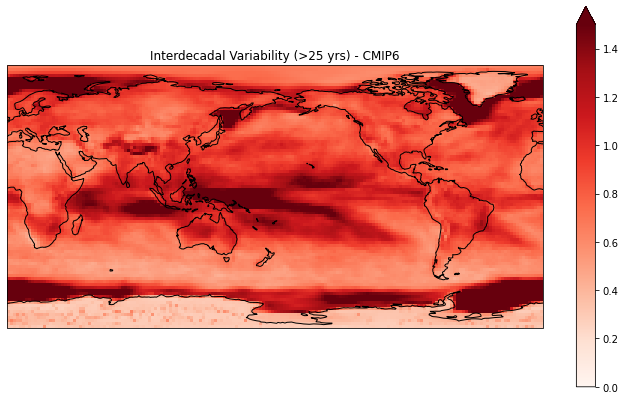

In [22]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
toa_control.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Reds', vmin=0, vmax=1.5)
ax.coastlines(color='black', linewidth=1)
plt.title('Interdecadal Variability (>25 yrs) - CMIP6')

Text(0.5, 1.0, 'Interdecadal Variability (>25 yrs) - CMIP6')

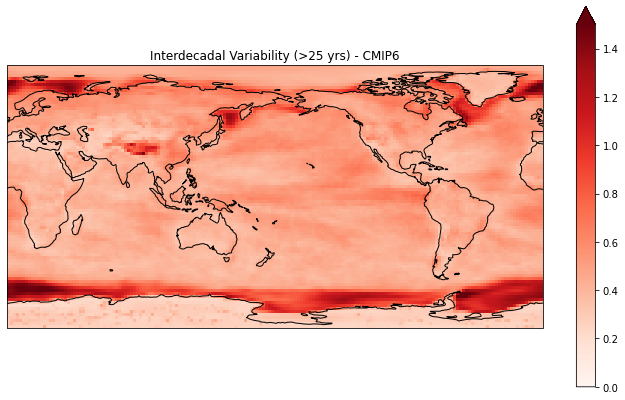

In [4]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
toa_control.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Reds', vmin=0, vmax=1.5)
ax.coastlines(color='black', linewidth=1)
plt.title('Interdecadal Variability (>25 yrs) - CMIP6')

In [11]:
toa_change = toa_hist_std - toa_control_std
surface_change = surface_hist_std - surface_control_std
horiz_change = horiz_hist_std - horiz_control_std
ocean_change = ocean_hist_std - ocean_control_std

toa_percent = toa_change*100/toa_control_std
surface_percent = surface_change*100/surface_control_std
horiz_percent = horiz_change*100/horiz_control_std
ocean_percent = ocean_change*100/ocean_control_std

In [18]:
toa_percent

<xarray.DataArray (lat: 88, lon: 179)>
array([[ 4.21179407e+01,  4.39806468e+01,  3.82303502e+01, ...,
         3.64624434e+01,  4.20439805e+01,  4.35314319e+01],
       [ 3.52081161e+01,  2.37747242e+00,  2.45421895e+01, ...,
         3.48371644e+01,  3.30714327e+01,  3.42128857e+01],
       [ 8.02634241e+01,  4.65523897e+01,  1.35517146e+00, ...,
         2.34491132e+01,  2.43981704e+01,  2.53283187e+01],
       ...,
       [ 2.41409294e+00,  4.62841924e+00,  6.72532994e+00, ...,
        -6.02323565e-02,  1.88196903e+00,  3.65099538e+00],
       [ 1.19709260e+01,  1.49860628e+01,  1.51480287e+01, ...,
         1.41629540e+01,  1.48246793e+01,  1.41525994e+01],
       [ 1.63124603e+01,  2.18688422e+01,  2.28413310e+01, ...,
         1.92051670e+01,  2.02133100e+01,  2.05509985e+01]])
Coordinates:
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357

In [12]:
def marker(lat,lon):
    """ Leaves marker on plot """
    plt.plot(lon, lat, marker='o', color='r', transform=ccrs.PlateCarree(), markersize=20)

Text(0.5, 1.0, 'Ocean')

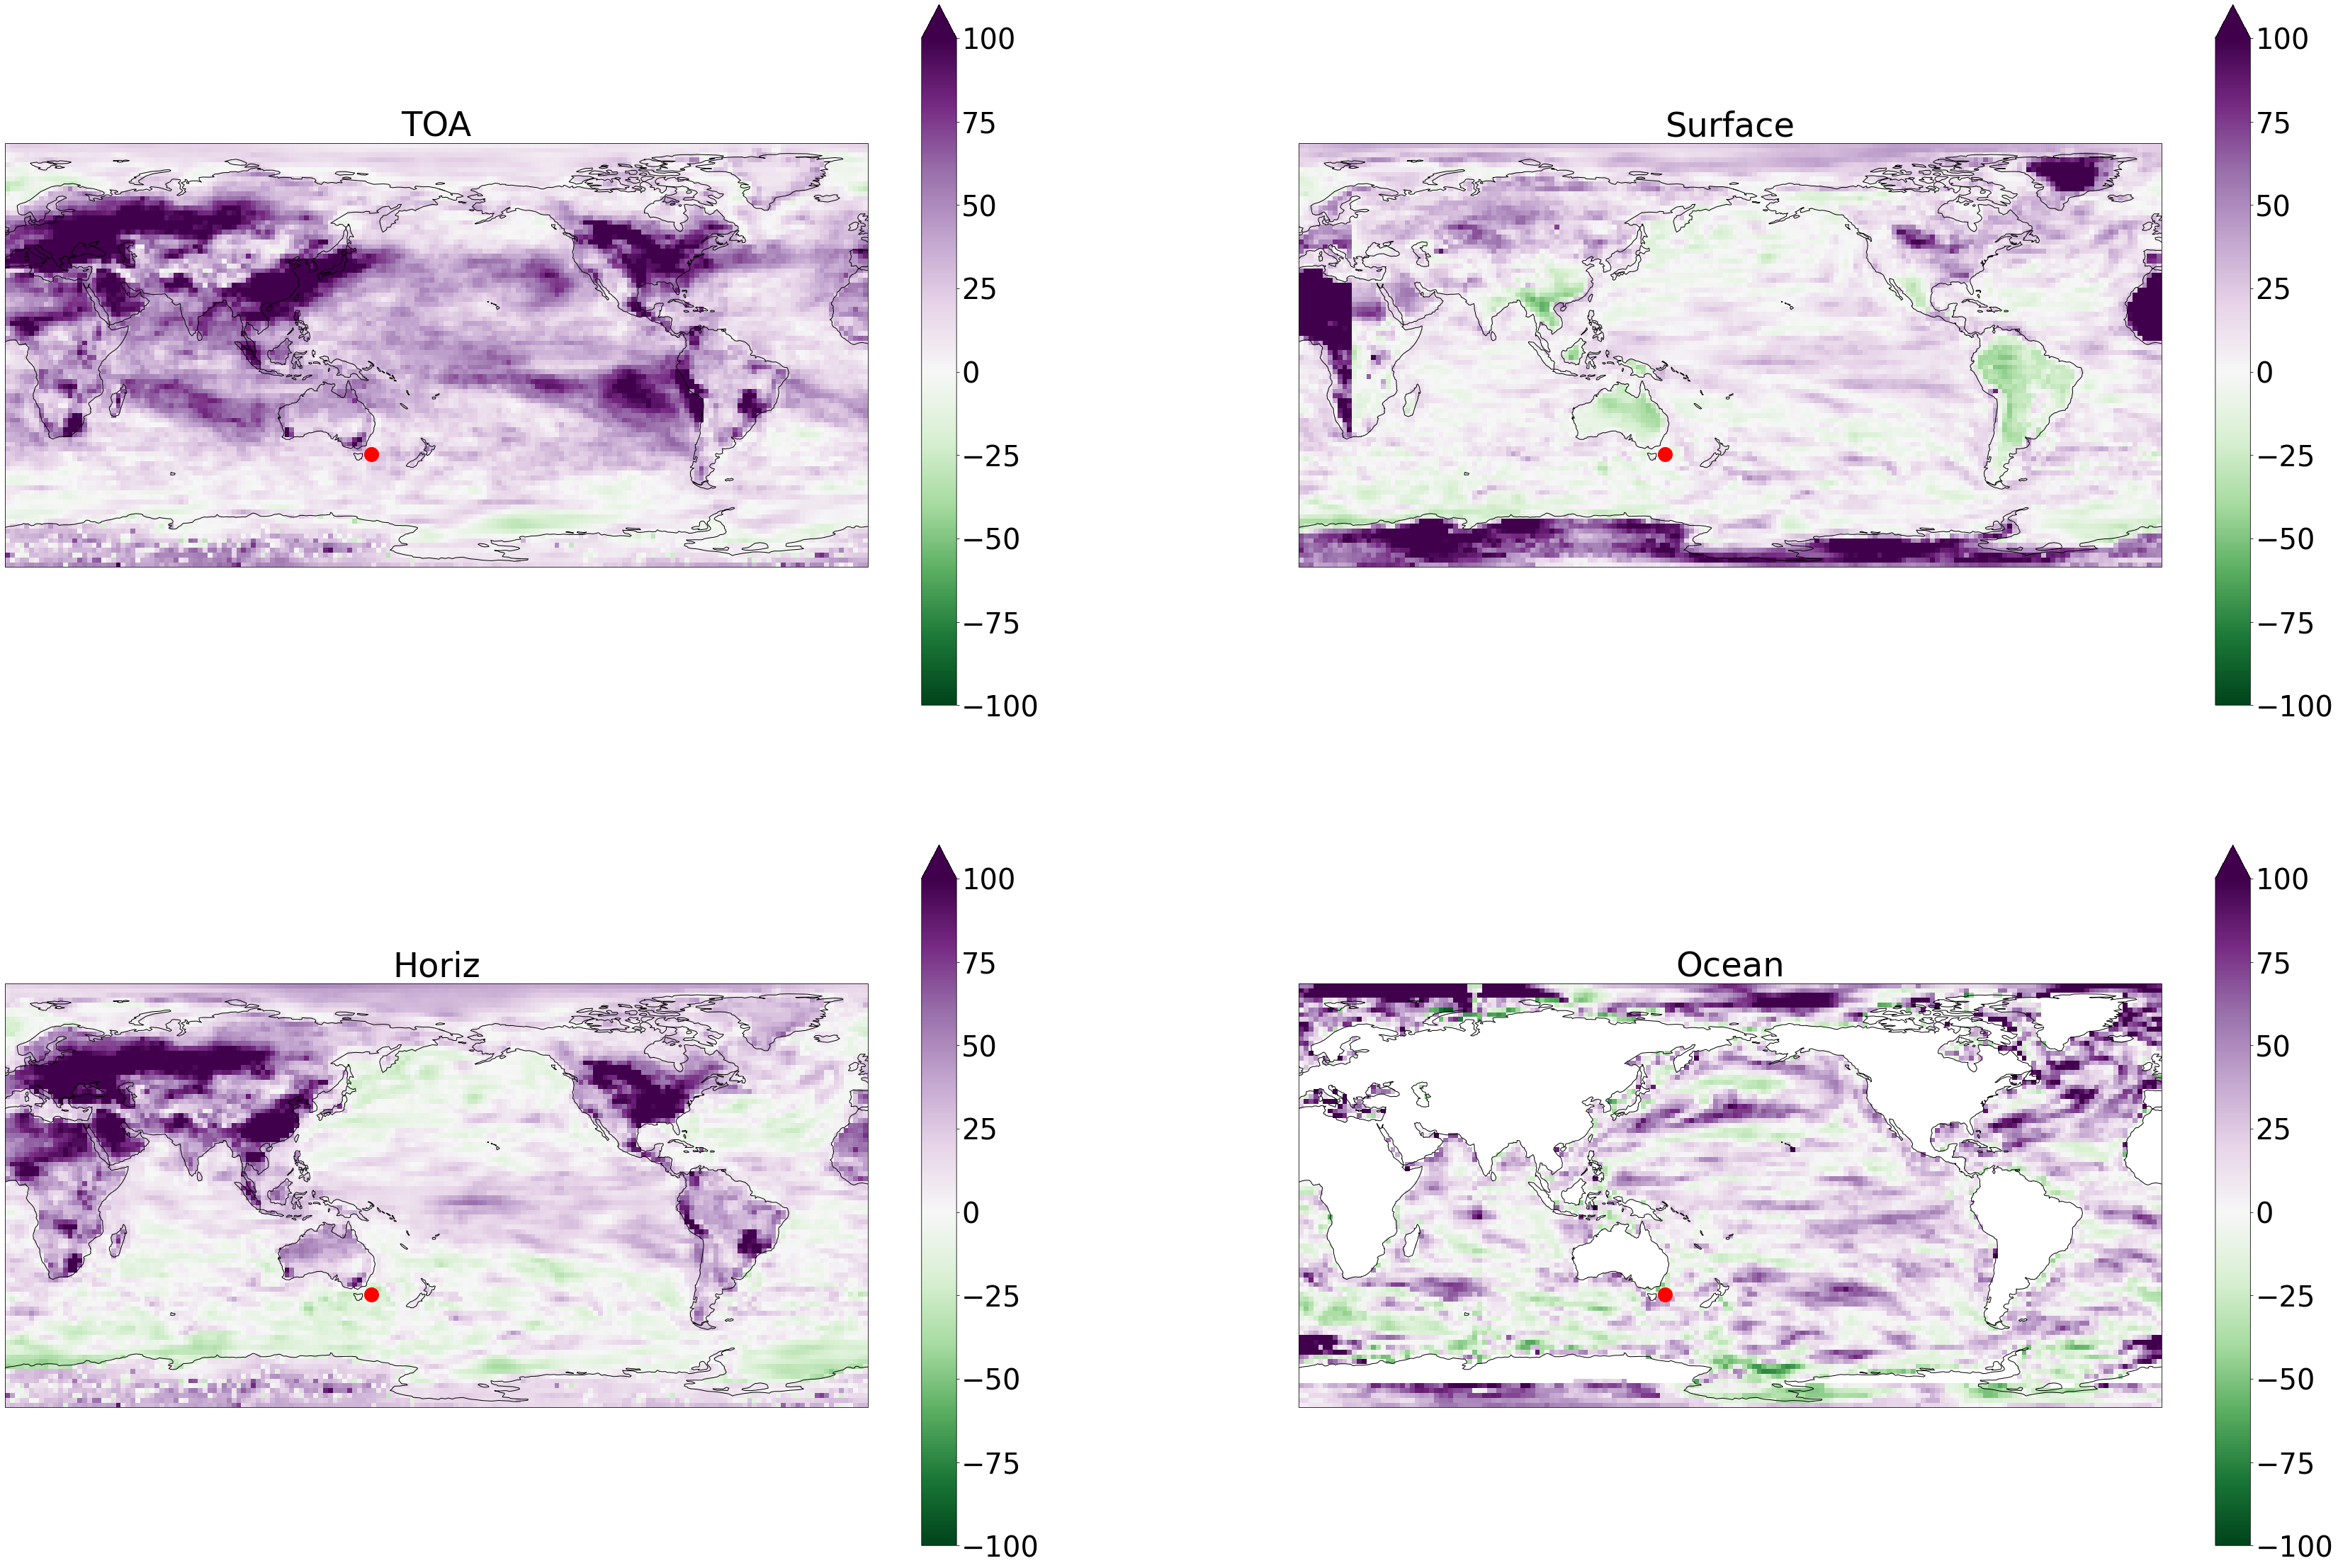

In [37]:
fig = plt.figure(figsize=(60, 40))
gs = gridspec.GridSpec(4, 4)
gs.update(wspace=0.1)
top=300
bottom=270
font = {'size'   : 40,
        'weight' : 'normal'}

matplotlib.rc('font', **font)
lat = -41
lon = 152

ax1 = fig.add_subplot(221, projection=ccrs.PlateCarree(central_longitude=180))
toa_percent.plot(ax=ax1, transform=ccrs.PlateCarree(), cmap='PRGn_r', vmin=-100, vmax=100)
ax1.coastlines(color='black', linewidth=1)
marker(lat,lon)
ax1.set_title('TOA')

ax2 = fig.add_subplot(222, projection=ccrs.PlateCarree(central_longitude=180))
surface_percent.plot(ax=ax2, transform=ccrs.PlateCarree(), cmap='PRGn_r', vmin=-100, vmax=100)
ax2.coastlines(color='black', linewidth=1)
marker(lat,lon)
ax2.set_title('Surface')

ax3 = fig.add_subplot(223, projection=ccrs.PlateCarree(central_longitude=180))
horiz_percent.plot(ax=ax3, transform=ccrs.PlateCarree(), cmap='PRGn_r', vmin=-100, vmax=100)
ax3.coastlines(color='black', linewidth=1)
marker(lat,lon)
ax3.set_title('Horiz')

ax4 = fig.add_subplot(224, projection=ccrs.PlateCarree(central_longitude=180))
ocean_percent.plot(ax=ax4, transform=ccrs.PlateCarree(), cmap='PRGn_r', vmin=-100, vmax=100)
ax4.coastlines(color='black', linewidth=1)
marker(lat,lon)
ax4.set_title('Ocean')

Text(0.5, 1.0, 'Ocean')

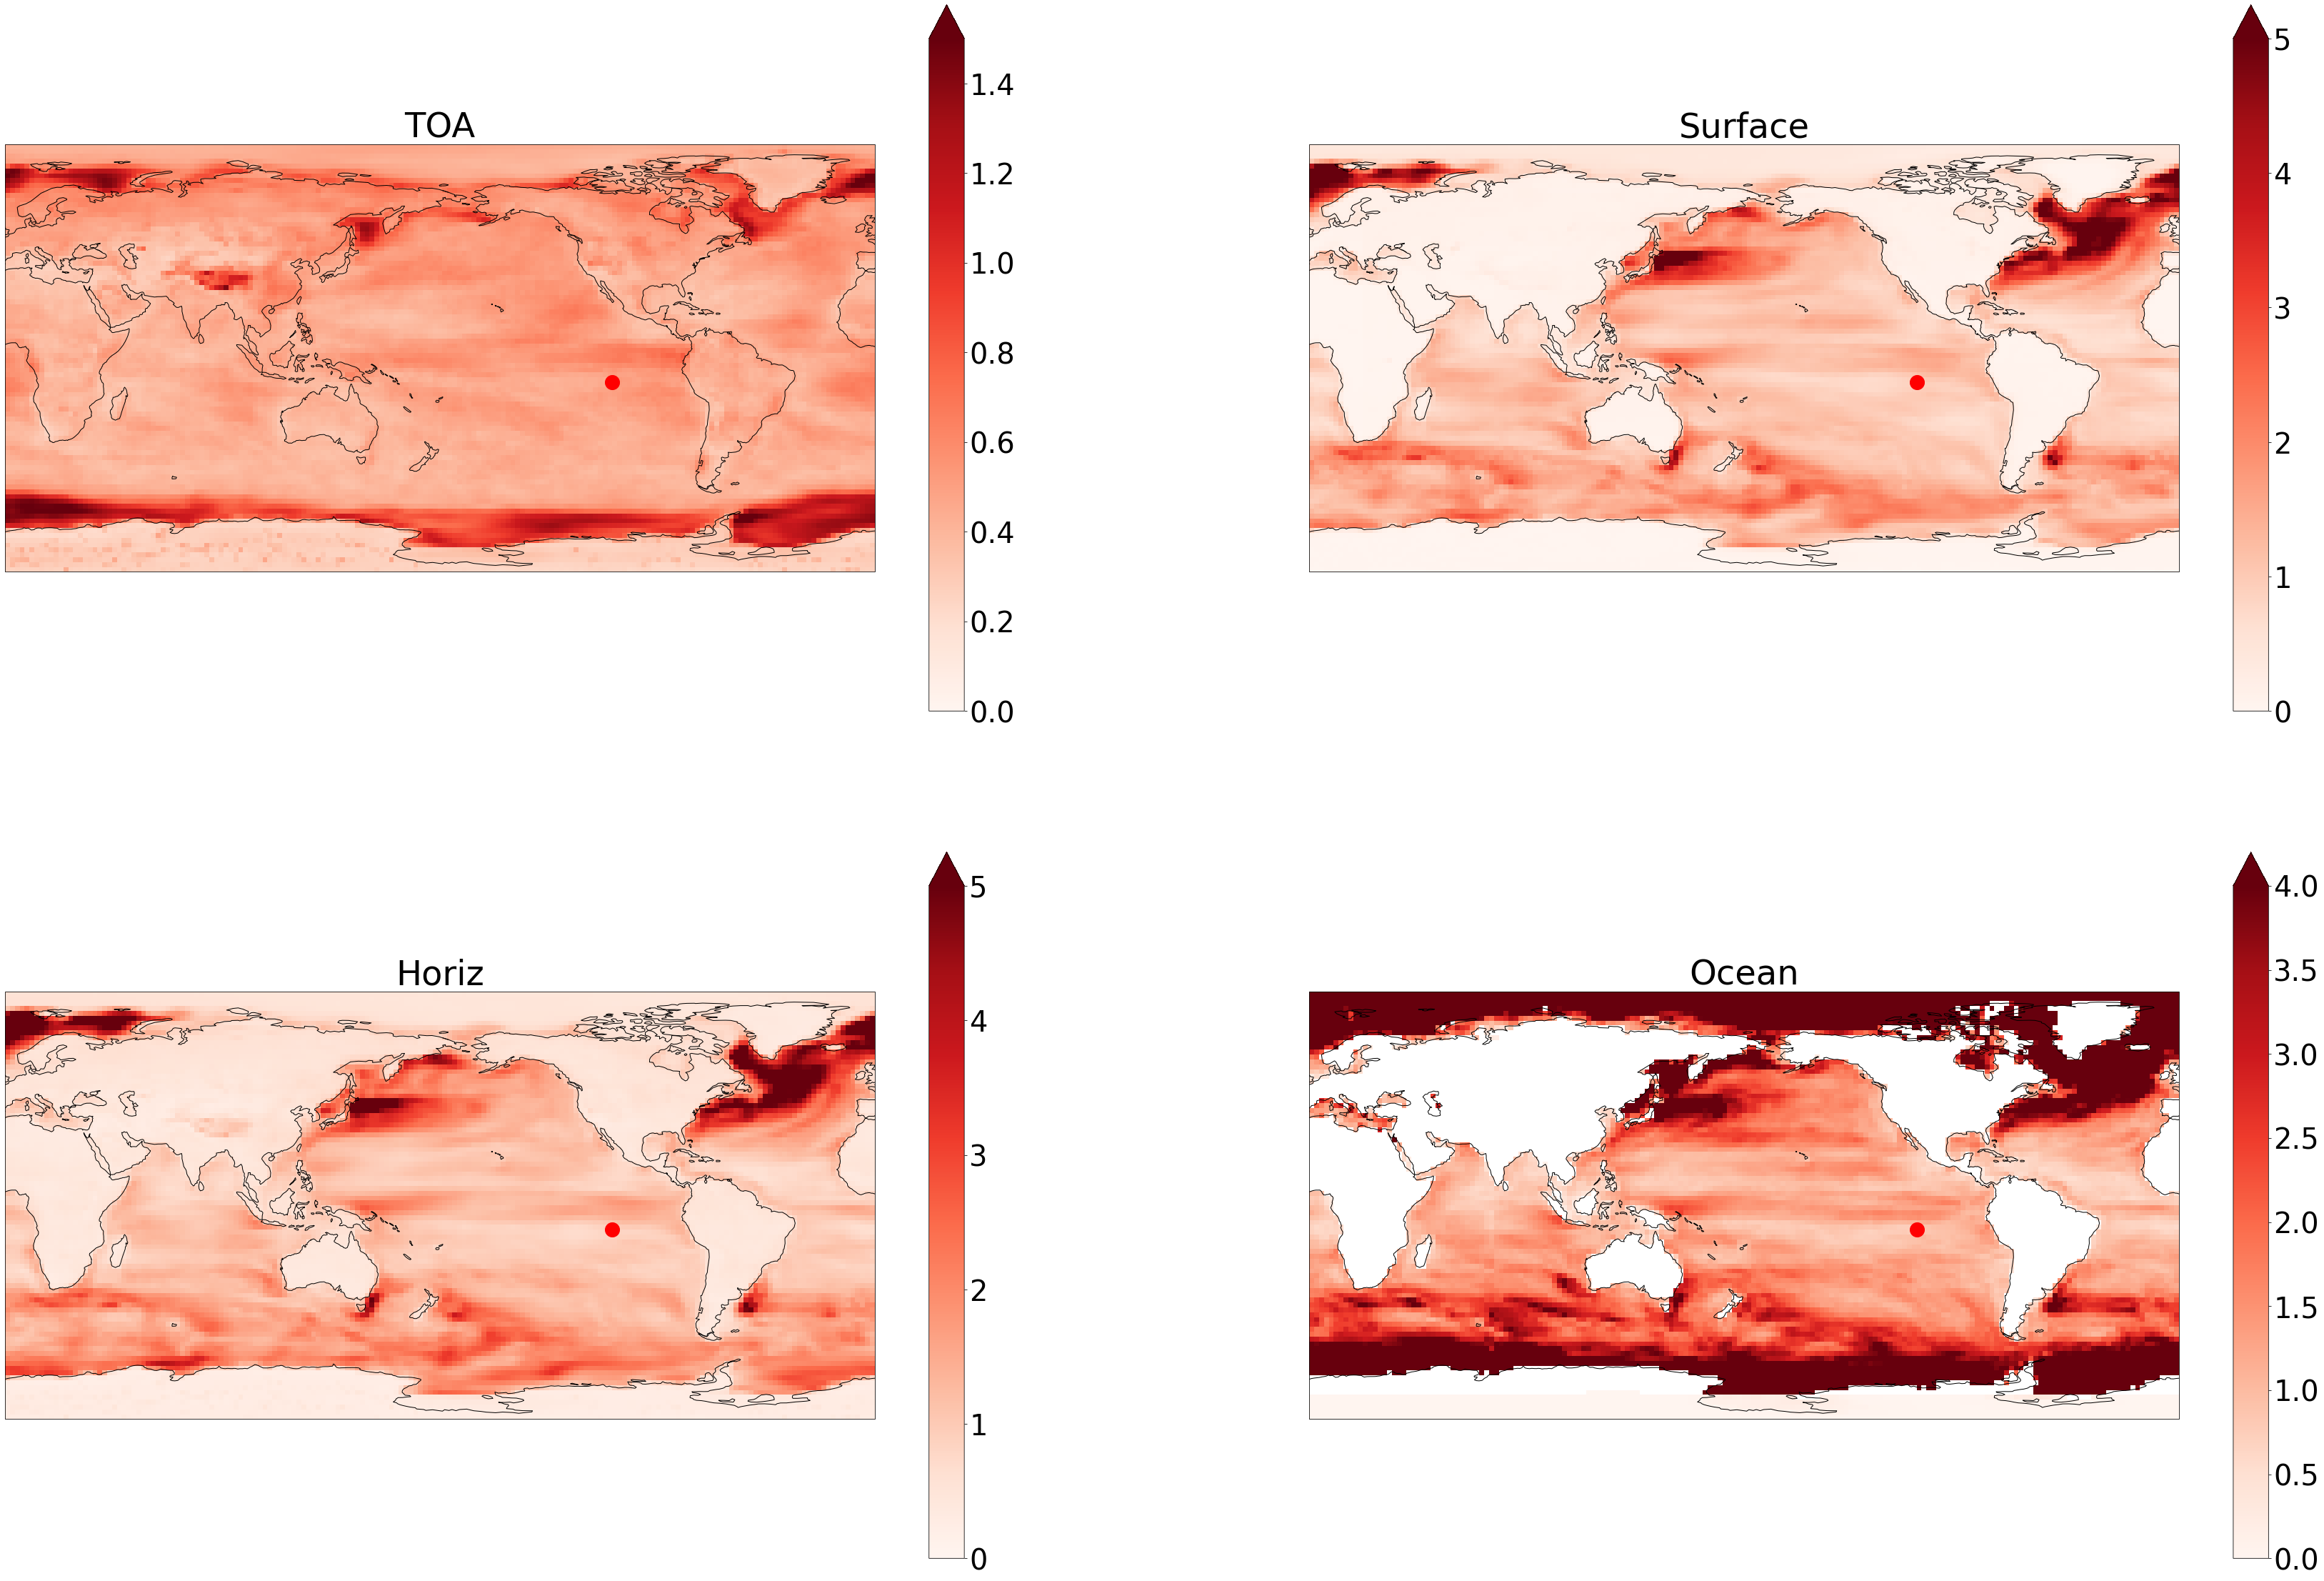

In [41]:
fig = plt.figure(figsize=(60, 40))
gs = gridspec.GridSpec(4, 4)
gs.update(wspace=0.1)
top=300
bottom=270
font = {'size'   : 40,
        'weight' : 'normal'}

matplotlib.rc('font', **font)
lat = -10
lon = 250

ax1 = fig.add_subplot(221, projection=ccrs.PlateCarree(central_longitude=180))
toa_control_std.plot(ax=ax1, transform=ccrs.PlateCarree(), cmap='Reds', vmin=0, vmax=1.5)
ax1.coastlines(color='black', linewidth=1)
marker(lat,lon)
ax1.set_title('TOA')

ax2 = fig.add_subplot(222, projection=ccrs.PlateCarree(central_longitude=180))
surface_control_std.plot(ax=ax2, transform=ccrs.PlateCarree(), cmap='Reds', vmin=0, vmax=5)
ax2.coastlines(color='black', linewidth=1)
marker(lat,lon)
ax2.set_title('Surface')

ax3 = fig.add_subplot(223, projection=ccrs.PlateCarree(central_longitude=180))
horiz_control_std.plot(ax=ax3, transform=ccrs.PlateCarree(), cmap='Reds', vmin=0, vmax=5)
ax3.coastlines(color='black', linewidth=1)
marker(lat,lon)
ax3.set_title('Horiz')

ax4 = fig.add_subplot(224, projection=ccrs.PlateCarree(central_longitude=180))
ocean_control_std.plot(ax=ax4, transform=ccrs.PlateCarree(), cmap='Reds', vmin=0, vmax=4)
ax4.coastlines(color='black', linewidth=1)
marker(lat,lon)
ax4.set_title('Ocean')

# Warm Pool

In [13]:
wp_toa_control = toa_control_rolling.mean('name').sel(lat=0,method='nearest').sel(lon=158,method='nearest').isel(time=slice(300,1980))
wp_toa_hist = toa_hist_rolling.mean('name').sel(lat=0,method='nearest').sel(lon=158,method='nearest').isel(time=slice(300,1980))

wp_surface_control = surface_control_rolling.mean('name').sel(lat=0,method='nearest').sel(lon=158,method='nearest').isel(time=slice(300,1980))
wp_surface_hist = surface_hist_rolling.mean('name').sel(lat=0,method='nearest').sel(lon=158,method='nearest').isel(time=slice(300,1980))

wp_horiz_control = horiz_control_rolling.mean('name').sel(lat=0,method='nearest').sel(lon=158,method='nearest').isel(time=slice(300,1980))
wp_horiz_hist = horiz_hist_rolling.mean('name').sel(lat=0,method='nearest').sel(lon=158,method='nearest').isel(time=slice(300,1980))

wp_ocean_control = ocean_control_rolling.mean('name').sel(lat=0,method='nearest').sel(lon=158,method='nearest').isel(time=slice(300,1980))
wp_ocean_hist = ocean_hist_rolling.mean('name').sel(lat=0,method='nearest').sel(lon=158,method='nearest').isel(time=slice(300,1980))

Text(0.5, 1.0, 'Ocean')

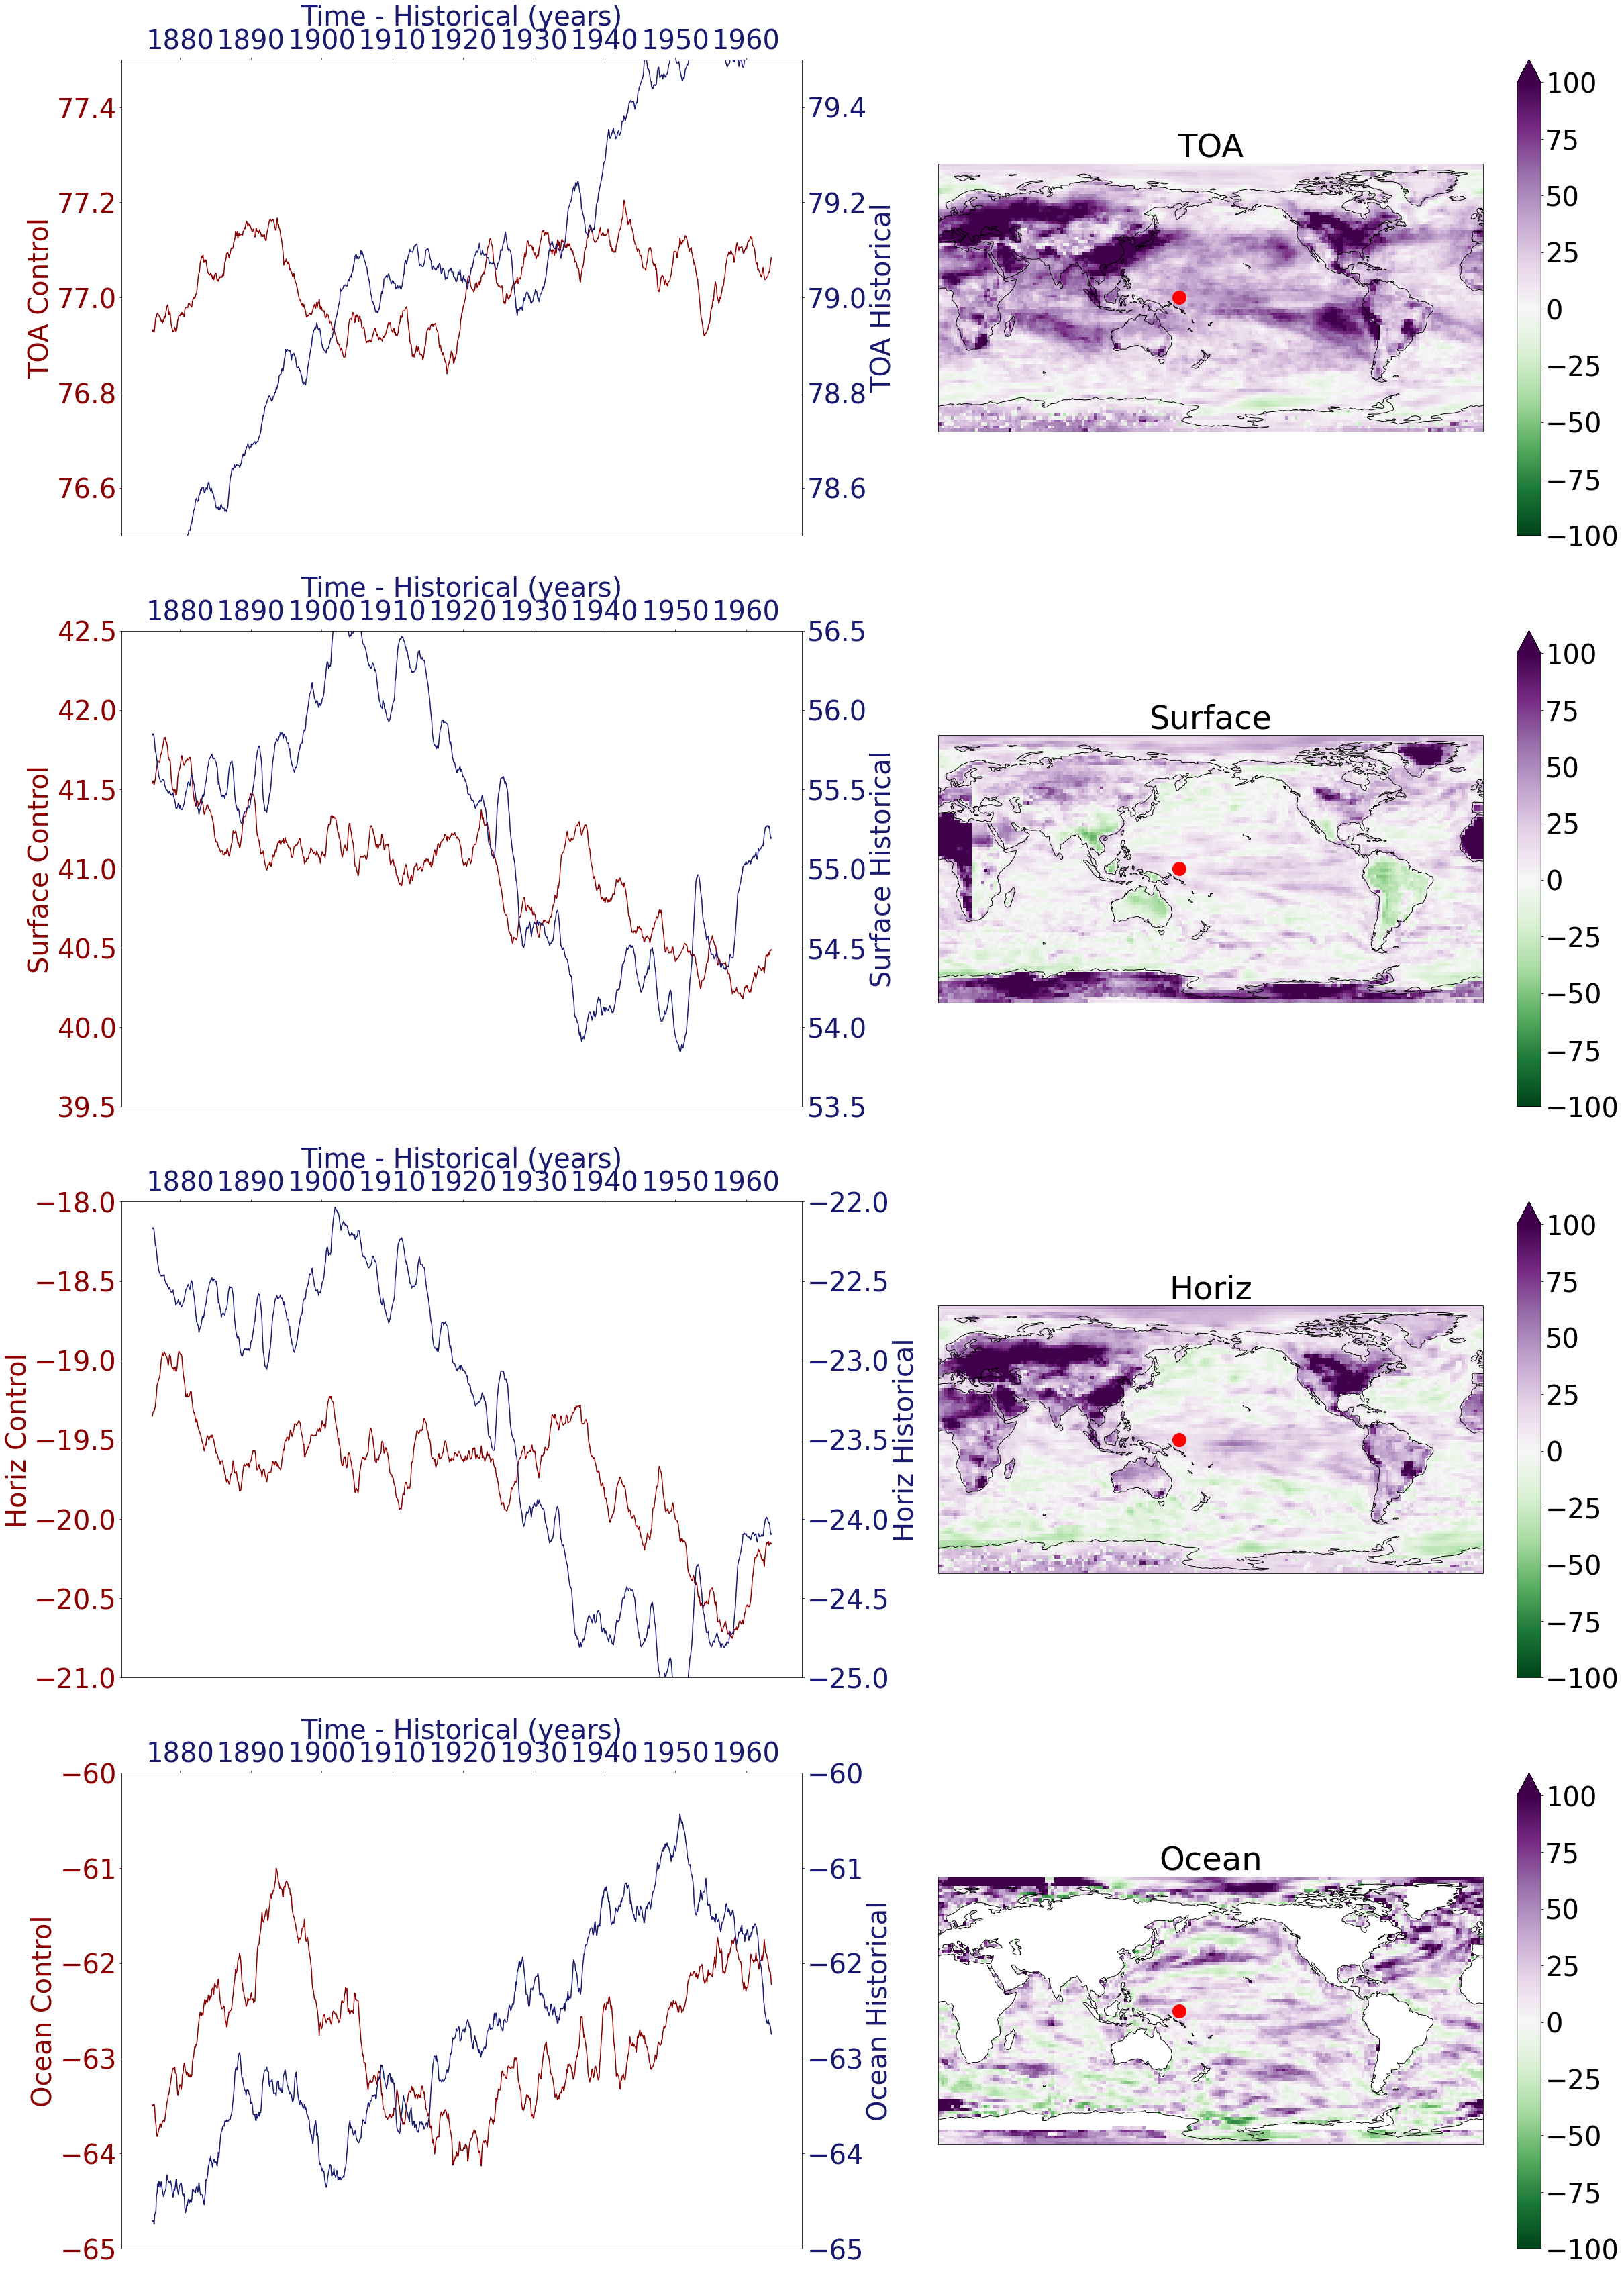

In [47]:
fig = plt.figure(figsize=(40, 60))
gs = gridspec.GridSpec(4, 4)
gs.update(wspace=0.1)
top=300
bottom=270
font = {'size'   : 40,
        'weight' : 'normal'}

matplotlib.rc('font', **font)
lat = 0
lon = 158

ax = fig.add_subplot(421, label="Control")
ax2 = fig.add_subplot(421, label="Historical", frame_on=False)
ax.xaxis.set_visible(False)
ax.plot(wp_toa_control['time'].values,wp_toa_control, color="darkred")
ax.set_xlabel('Time - Control (years)', color="darkred")
ax.set_ylabel('TOA Control', color="darkred")
ax.set_ylim(bottom=76.5,top=77.5)
ax.tick_params(axis='x', colors="darkred")
ax.tick_params(axis='y', colors="darkred")

ax2.plot(wp_toa_hist['time'].values,wp_toa_hist, color="midnightblue")
ax2.xaxis.tick_top()
ax2.yaxis.tick_right()
ax2.set_xlabel('Time - Historical (years)', color="midnightblue") 
ax2.set_ylabel('TOA Historical', color="midnightblue")  
ax2.set_ylim(top=79.5,bottom=78.5)
ax2.xaxis.set_label_position('top') 
#ax2.yaxis.set_visible(False)
ax2.yaxis.set_label_position('right') 
ax2.tick_params(axis='x', colors="midnightblue")
ax2.tick_params(axis='y', colors="midnightblue")

ax3 = fig.add_subplot(422, projection=ccrs.PlateCarree(central_longitude=180))
toa_percent.plot(ax=ax3, transform=ccrs.PlateCarree(), cmap='PRGn_r', vmin=-100, vmax=100)
ax3.coastlines(color='black', linewidth=1)
marker(lat,lon)
ax3.set_title('TOA')

ax4 = fig.add_subplot(423, label="Control")
ax5 = fig.add_subplot(423, label="Historical", frame_on=False)
ax4.xaxis.set_visible(False)
ax4.plot(wp_surface_control['time'].values,wp_surface_control, color="darkred")
ax4.set_xlabel('Time - Control (years)', color="darkred")
ax4.set_ylabel('Surface Control', color="darkred")
ax4.set_ylim(bottom=39.5,top=42.5)
ax4.tick_params(axis='x', colors="darkred")
ax4.tick_params(axis='y', colors="darkred")

ax5.plot(wp_surface_hist['time'].values,wp_surface_hist, color="midnightblue")
ax5.xaxis.tick_top()
ax5.yaxis.tick_right()
ax5.set_xlabel('Time - Historical (years)', color="midnightblue") 
ax5.set_ylabel('Surface Historical', color="midnightblue")  
ax5.set_ylim(top=56.5,bottom=53.5)
ax5.xaxis.set_label_position('top') 
#ax5.yaxis.set_visible(False)
ax5.yaxis.set_label_position('right') 
ax5.tick_params(axis='x', colors="midnightblue")
ax5.tick_params(axis='y', colors="midnightblue")

ax6 = fig.add_subplot(424, projection=ccrs.PlateCarree(central_longitude=180))
surface_percent.plot(ax=ax6, transform=ccrs.PlateCarree(), cmap='PRGn_r', vmin=-100, vmax=100)
ax6.coastlines(color='black', linewidth=1)
marker(lat,lon)
ax6.set_title('Surface')

ax7 = fig.add_subplot(425, label="Control")
ax8 = fig.add_subplot(425, label="Historical", frame_on=False)
ax7.xaxis.set_visible(False)
ax7.plot(wp_horiz_control['time'].values,wp_horiz_control, color="darkred")
ax7.set_xlabel('Time - Control (years)', color="darkred")
ax7.set_ylabel('Horiz Control', color="darkred")
ax7.set_ylim(bottom=-21,top=-18)
ax7.tick_params(axis='x', colors="darkred")
ax7.tick_params(axis='y', colors="darkred")

ax8.plot(wp_horiz_hist['time'].values,wp_horiz_hist, color="midnightblue")
ax8.xaxis.tick_top()
ax8.yaxis.tick_right()
ax8.set_xlabel('Time - Historical (years)', color="midnightblue") 
ax8.set_ylabel('Horiz Historical', color="midnightblue")  
ax8.set_ylim(top=-22,bottom=-25)
ax8.xaxis.set_label_position('top') 
#ax8.yaxis.set_visible(False)
ax8.yaxis.set_label_position('right') 
ax8.tick_params(axis='x', colors="midnightblue")
ax8.tick_params(axis='y', colors="midnightblue")

ax9 = fig.add_subplot(426, projection=ccrs.PlateCarree(central_longitude=180))
horiz_percent.plot(ax=ax9, transform=ccrs.PlateCarree(), cmap='PRGn_r', vmin=-100, vmax=100)
ax9.coastlines(color='black', linewidth=1)
marker(lat,lon)
ax9.set_title('Horiz')

ax10 = fig.add_subplot(427, label="Control")
ax11 = fig.add_subplot(427, label="Historical", frame_on=False)
ax10.xaxis.set_visible(False)
ax10.plot(wp_ocean_control['time'].values,wp_ocean_control, color="darkred")
ax10.set_xlabel('Time - Control (years)', color="darkred")
ax10.set_ylabel('Ocean Control', color="darkred")
ax10.set_ylim(bottom=-65,top=-60)
ax10.tick_params(axis='x', colors="darkred")
ax10.tick_params(axis='y', colors="darkred")

ax11.plot(wp_ocean_hist['time'].values,wp_ocean_hist, color="midnightblue")
ax11.xaxis.tick_top()
ax11.yaxis.tick_right()
ax11.set_xlabel('Time - Historical (years)', color="midnightblue") 
ax11.set_ylabel('Ocean Historical', color="midnightblue")  
ax11.set_ylim(top=-60,bottom=-65)
ax11.yaxis.set_label_position('right') 
ax11.xaxis.set_label_position('top') 
ax11.tick_params(axis='x', colors="midnightblue")
ax11.tick_params(axis='y', colors="midnightblue")

ax12 = fig.add_subplot(428, projection=ccrs.PlateCarree(central_longitude=180))
ocean_percent.plot(ax=ax12, transform=ccrs.PlateCarree(), cmap='PRGn_r', vmin=-100, vmax=100)
ax12.coastlines(color='black', linewidth=1)
marker(lat,lon)
ax12.set_title('Ocean')

Text(0.5, 1.0, 'Ocean')

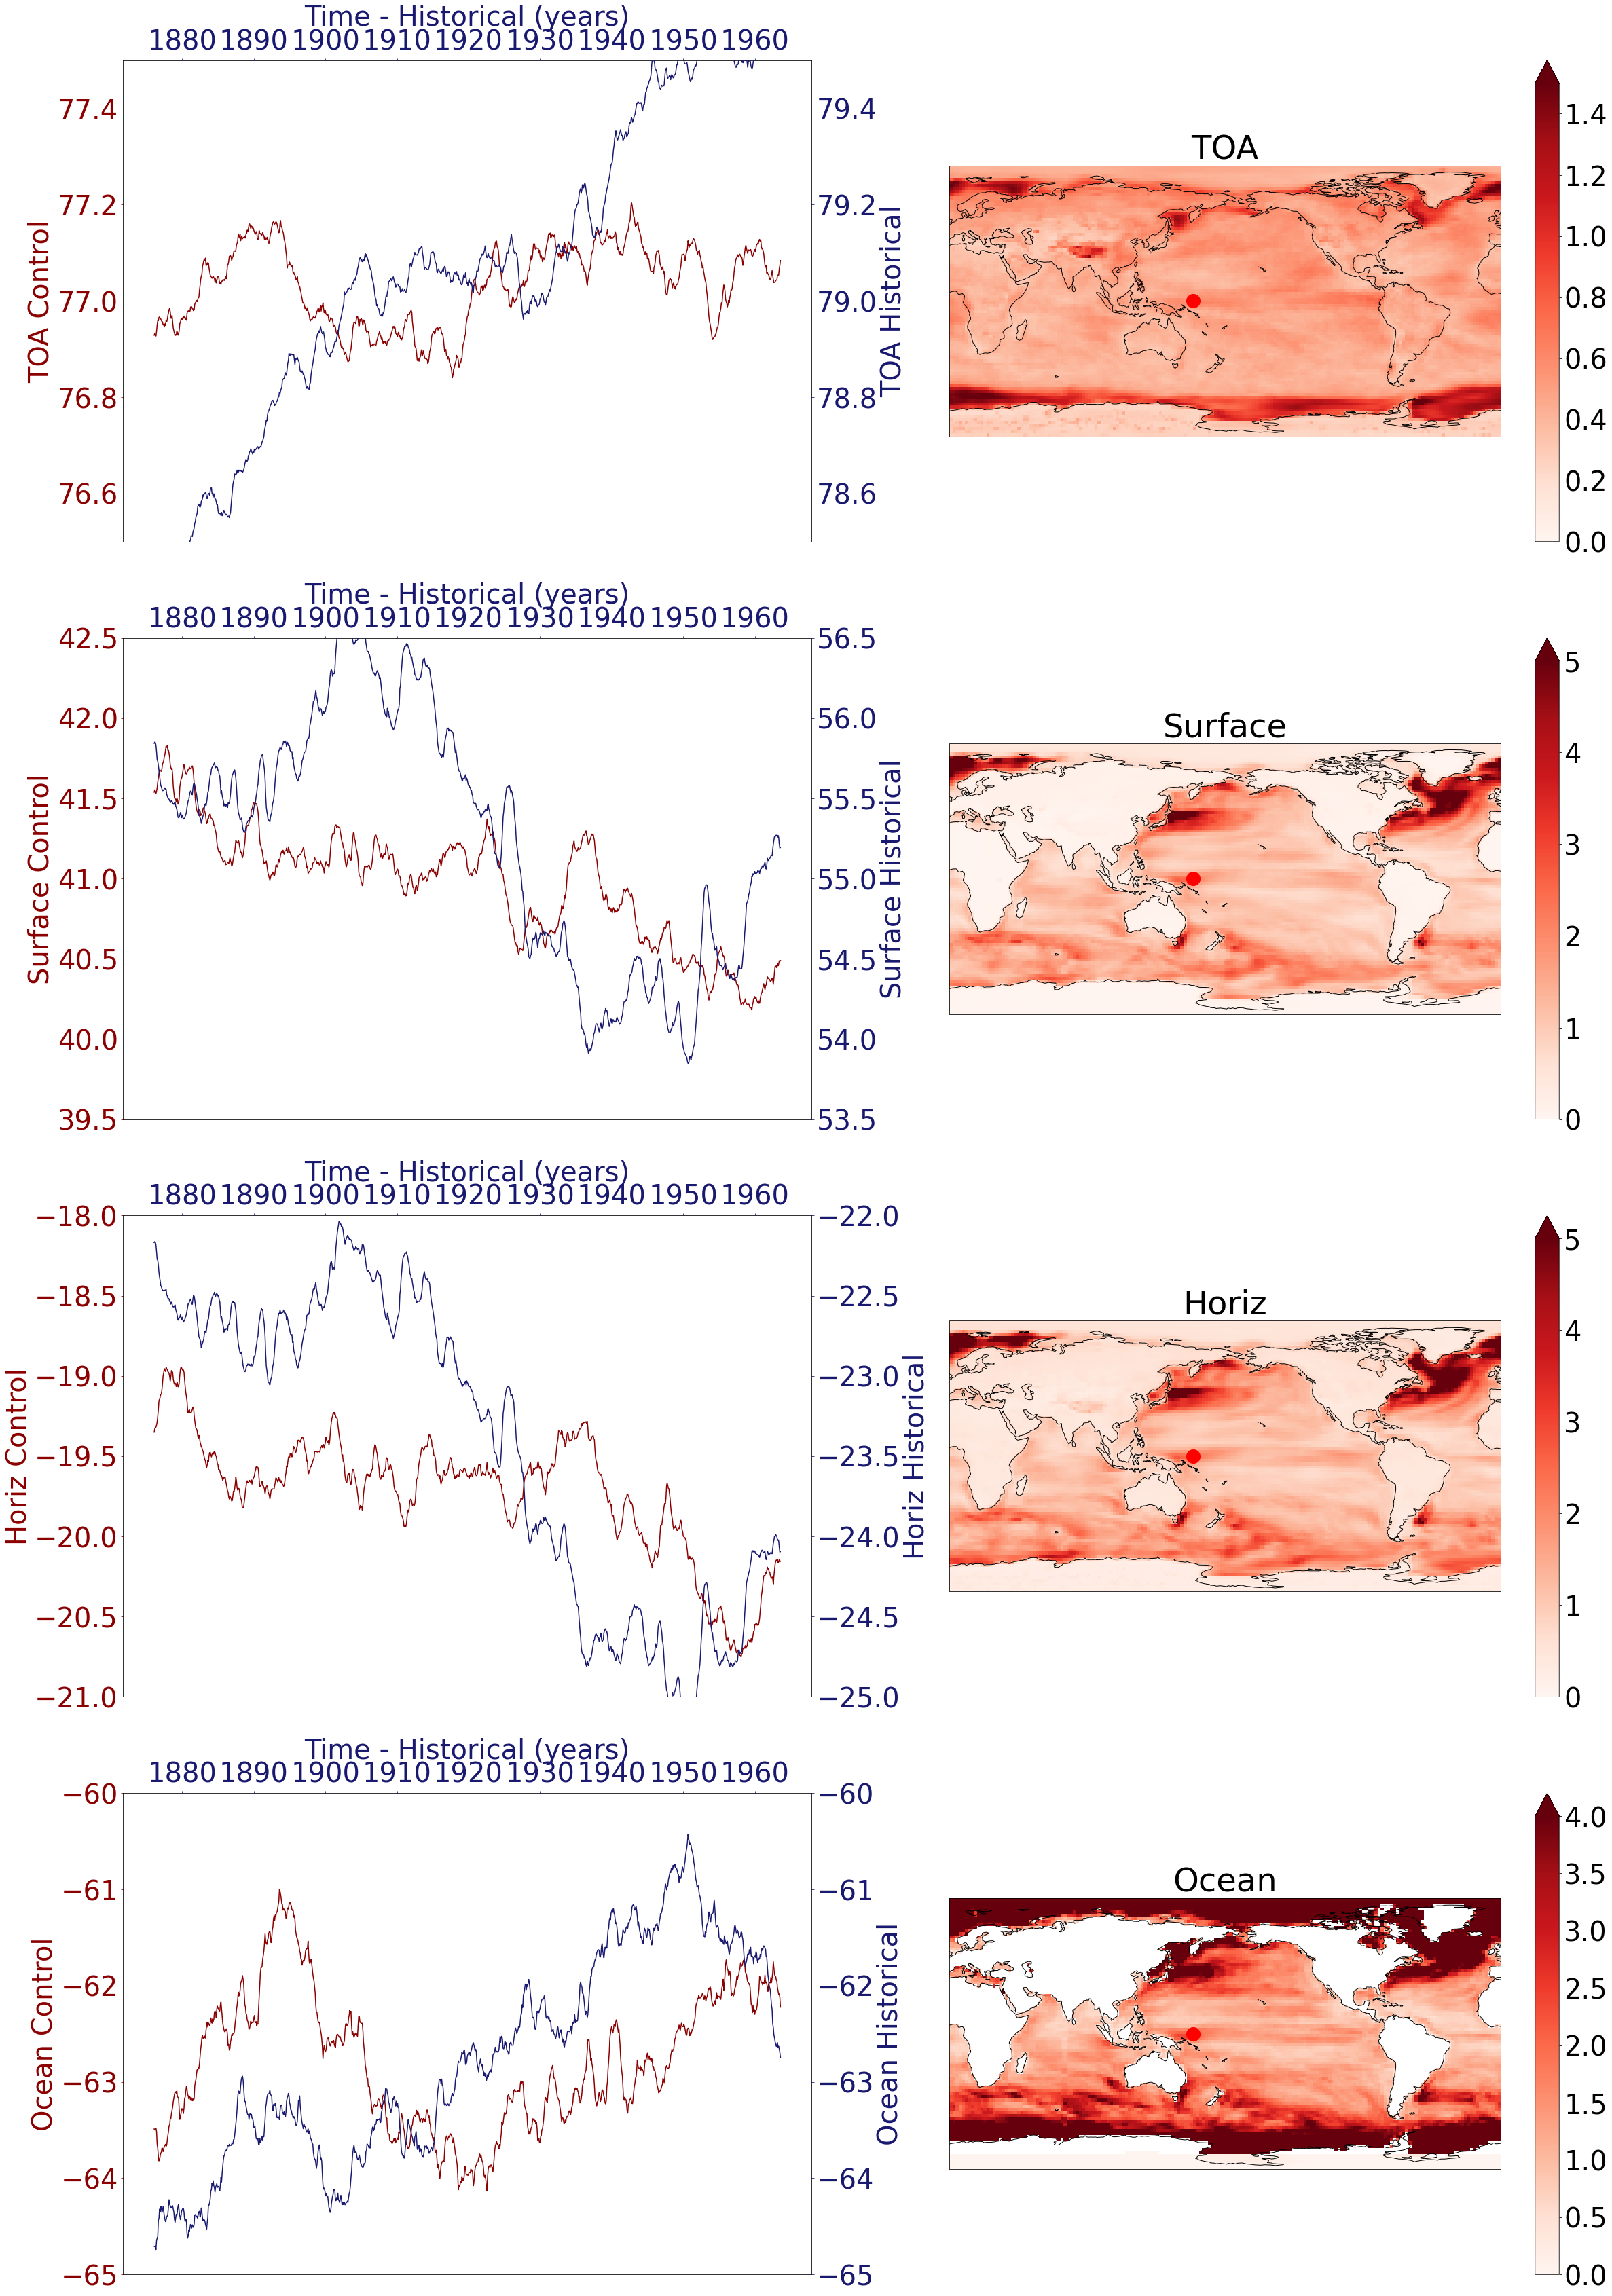

In [30]:
fig = plt.figure(figsize=(40, 60))
gs = gridspec.GridSpec(4, 4)
gs.update(wspace=0.1)
top=300
bottom=270
font = {'size'   : 40,
        'weight' : 'normal'}

matplotlib.rc('font', **font)
lat = 0
lon = 158

ax = fig.add_subplot(421, label="Control")
ax2 = fig.add_subplot(421, label="Historical", frame_on=False)
ax.xaxis.set_visible(False)
ax.plot(wp_toa_control['time'].values,wp_toa_control, color="darkred")
ax.set_xlabel('Time - Control (years)', color="darkred")
ax.set_ylabel('TOA Control', color="darkred")
ax.set_ylim(bottom=76.5,top=77.5)
ax.tick_params(axis='x', colors="darkred")
ax.tick_params(axis='y', colors="darkred")

ax2.plot(wp_toa_hist['time'].values,wp_toa_hist, color="midnightblue")
ax2.xaxis.tick_top()
ax2.yaxis.tick_right()
ax2.set_xlabel('Time - Historical (years)', color="midnightblue") 
ax2.set_ylabel('TOA Historical', color="midnightblue")  
ax2.set_ylim(top=79.5,bottom=78.5)
ax2.xaxis.set_label_position('top') 
ax2.yaxis.set_label_position('right') 
ax2.tick_params(axis='x', colors="midnightblue")
ax2.tick_params(axis='y', colors="midnightblue")

ax3 = fig.add_subplot(422, projection=ccrs.PlateCarree(central_longitude=180))
toa_control_std.plot(ax=ax3, transform=ccrs.PlateCarree(), cmap='Reds', vmin=0, vmax=1.5)
ax3.coastlines(color='black', linewidth=1)
marker(lat,lon)
ax3.set_title('TOA')

ax4 = fig.add_subplot(423, label="Control")
ax5 = fig.add_subplot(423, label="Historical", frame_on=False)
ax4.xaxis.set_visible(False)
ax4.plot(wp_surface_control['time'].values,wp_surface_control, color="darkred")
ax4.set_xlabel('Time - Control (years)', color="darkred")
ax4.set_ylabel('Surface Control', color="darkred")
ax4.set_ylim(bottom=39.5,top=42.5)
ax4.tick_params(axis='x', colors="darkred")
ax4.tick_params(axis='y', colors="darkred")

ax5.plot(wp_surface_hist['time'].values,wp_surface_hist, color="midnightblue")
ax5.xaxis.tick_top()
ax5.yaxis.tick_right()
ax5.set_xlabel('Time - Historical (years)', color="midnightblue") 
ax5.set_ylabel('Surface Historical', color="midnightblue")  
ax5.set_ylim(top=56.5,bottom=53.5)
ax5.xaxis.set_label_position('top') 
ax5.yaxis.set_label_position('right') 
ax5.tick_params(axis='x', colors="midnightblue")
ax5.tick_params(axis='y', colors="midnightblue")

ax6 = fig.add_subplot(424, projection=ccrs.PlateCarree(central_longitude=180))
surface_control_std.plot(ax=ax6, transform=ccrs.PlateCarree(), cmap='Reds', vmin=0, vmax=5)
ax6.coastlines(color='black', linewidth=1)
marker(lat,lon)
ax6.set_title('Surface')

ax7 = fig.add_subplot(425, label="Control")
ax8 = fig.add_subplot(425, label="Historical", frame_on=False)
ax7.xaxis.set_visible(False)
ax7.plot(wp_horiz_control['time'].values,wp_horiz_control, color="darkred")
ax7.set_xlabel('Time - Control (years)', color="darkred")
ax7.set_ylabel('Horiz Control', color="darkred")
ax7.set_ylim(bottom=-21,top=-18)
ax7.tick_params(axis='x', colors="darkred")
ax7.tick_params(axis='y', colors="darkred")

ax8.plot(wp_horiz_hist['time'].values,wp_horiz_hist, color="midnightblue")
ax8.xaxis.tick_top()
ax8.yaxis.tick_right()
ax8.set_xlabel('Time - Historical (years)', color="midnightblue") 
ax8.set_ylabel('Horiz Historical', color="midnightblue")  
ax8.set_ylim(top=-22,bottom=-25)
ax8.xaxis.set_label_position('top') 
ax8.yaxis.set_label_position('right') 
ax8.tick_params(axis='x', colors="midnightblue")
ax8.tick_params(axis='y', colors="midnightblue")

ax9 = fig.add_subplot(426, projection=ccrs.PlateCarree(central_longitude=180))
horiz_control_std.plot(ax=ax9, transform=ccrs.PlateCarree(), cmap='Reds', vmin=0, vmax=5)
ax9.coastlines(color='black', linewidth=1)
marker(lat,lon)
ax9.set_title('Horiz')

ax10 = fig.add_subplot(427, label="Control")
ax11 = fig.add_subplot(427, label="Historical", frame_on=False)
ax10.xaxis.set_visible(False)
ax10.plot(wp_ocean_control['time'].values,wp_ocean_control, color="darkred")
ax10.set_xlabel('Time - Control (years)', color="darkred")
ax10.set_ylabel('Ocean Control', color="darkred")
ax10.set_ylim(bottom=-65,top=-60)
ax10.tick_params(axis='x', colors="darkred")
ax10.tick_params(axis='y', colors="darkred")

ax11.plot(wp_ocean_hist['time'].values,wp_ocean_hist, color="midnightblue")
ax11.xaxis.tick_top()
ax11.yaxis.tick_right()
ax11.set_xlabel('Time - Historical (years)', color="midnightblue") 
ax11.set_ylabel('Ocean Historical', color="midnightblue")  
ax11.set_ylim(top=-60,bottom=-65)
ax11.xaxis.set_label_position('top') 
ax11.yaxis.set_label_position('right') 
ax11.tick_params(axis='x', colors="midnightblue")
ax11.tick_params(axis='y', colors="midnightblue")

ax12 = fig.add_subplot(428, projection=ccrs.PlateCarree(central_longitude=180))
ocean_control_std.plot(ax=ax12, transform=ccrs.PlateCarree(), cmap='Reds', vmin=0, vmax=4)
ax12.coastlines(color='black', linewidth=1)
marker(lat,lon)
ax12.set_title('Ocean')

# SW Pacific (250,-10)

In [43]:
sw_toa_control = toa_control_rolling.mean('name').sel(lat=-10,method='nearest').sel(lon=250,method='nearest').isel(time=slice(300,1980))
sw_toa_hist = toa_hist_rolling.mean('name').sel(lat=-10,method='nearest').sel(lon=250,method='nearest').isel(time=slice(300,1980))

sw_surface_control = surface_control_rolling.mean('name').sel(lat=-10,method='nearest').sel(lon=250,method='nearest').isel(time=slice(300,1980))
sw_surface_hist = surface_hist_rolling.mean('name').sel(lat=-10,method='nearest').sel(lon=250,method='nearest').isel(time=slice(300,1980))

sw_horiz_control = horiz_control_rolling.mean('name').sel(lat=-10,method='nearest').sel(lon=250,method='nearest').isel(time=slice(300,1980))
sw_horiz_hist = horiz_hist_rolling.mean('name').sel(lat=-10,method='nearest').sel(lon=250,method='nearest').isel(time=slice(300,1980))

sw_ocean_control = ocean_control_rolling.mean('name').sel(lat=-10,method='nearest').sel(lon=250,method='nearest').isel(time=slice(300,1980))
sw_ocean_hist = ocean_hist_rolling.mean('name').sel(lat=-10,method='nearest').sel(lon=250,method='nearest').isel(time=slice(300,1980))

Text(0.5, 1.0, 'Ocean')

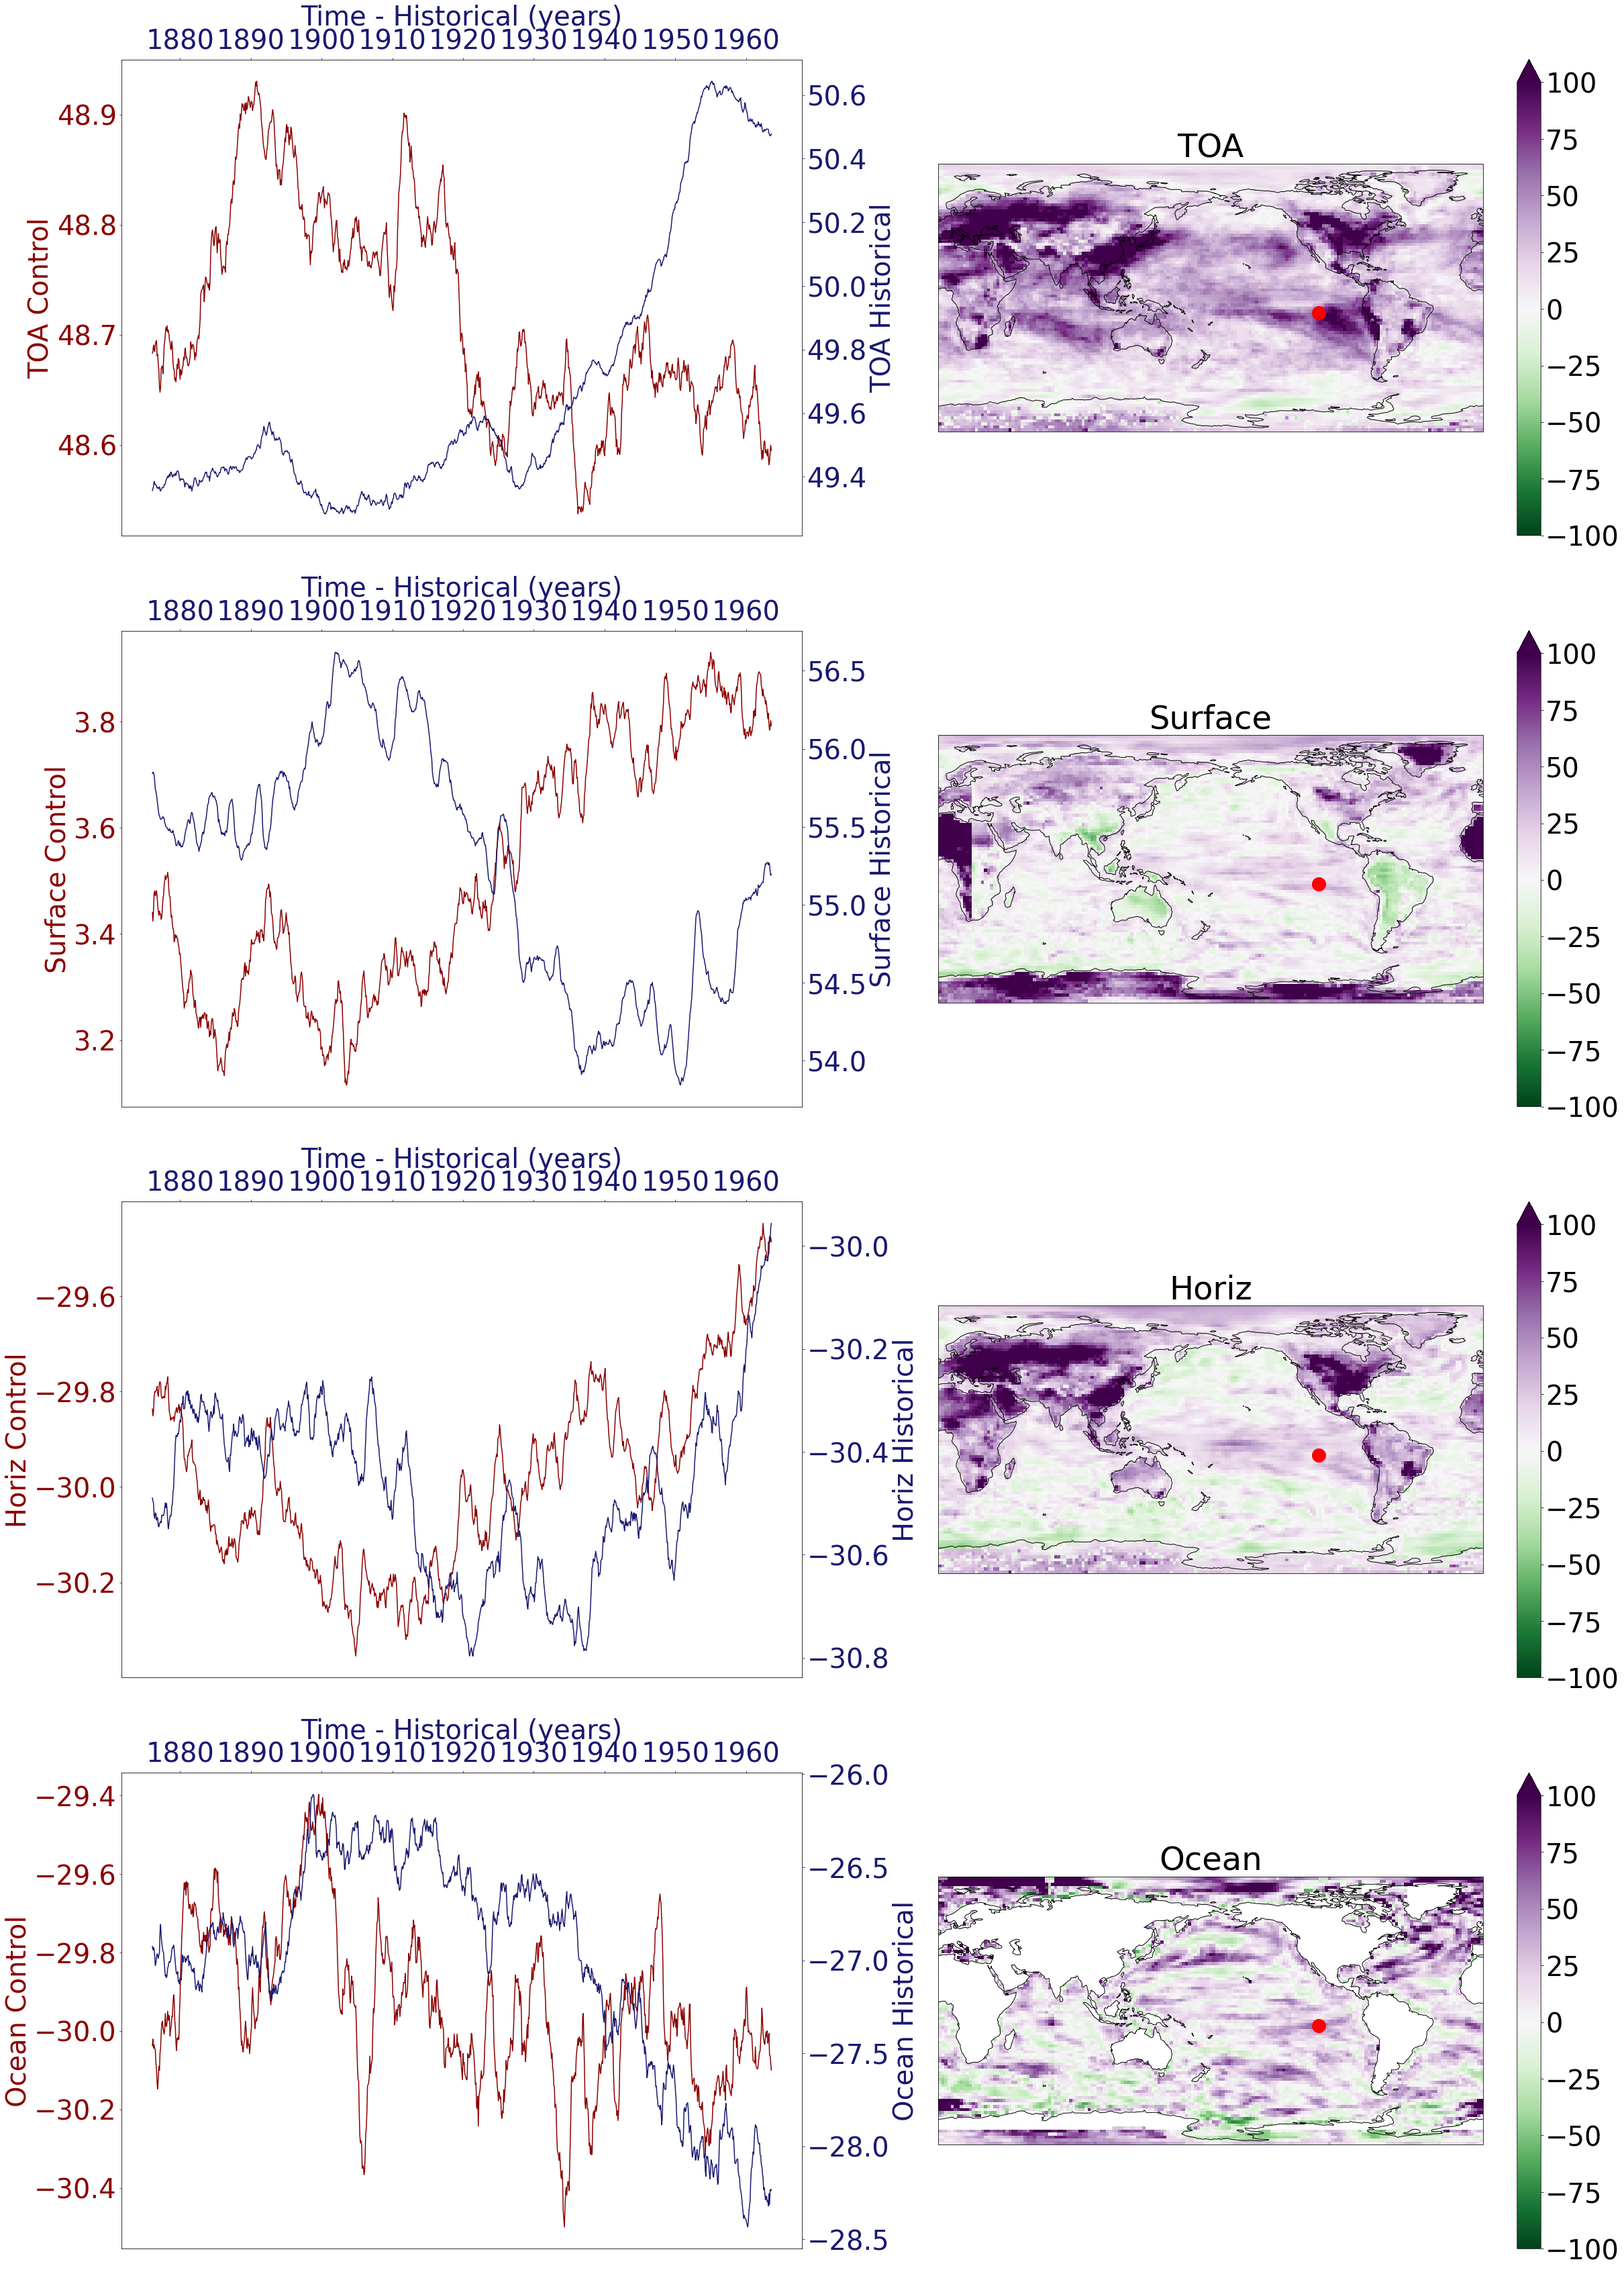

In [44]:
fig = plt.figure(figsize=(40, 60))
gs = gridspec.GridSpec(4, 4)
gs.update(wspace=0.1)
top=300
bottom=270
font = {'size'   : 40,
        'weight' : 'normal'}

matplotlib.rc('font', **font)
lat = -10
lon = 250

ax = fig.add_subplot(421, label="Control")
ax2 = fig.add_subplot(421, label="Historical", frame_on=False)
ax.xaxis.set_visible(False)
ax.plot(sw_toa_control['time'].values,sw_toa_control, color="darkred")
ax.set_xlabel('Time - Control (years)', color="darkred")
ax.set_ylabel('TOA Control', color="darkred")
#ax.set_ylim(bottom=76.5,top=77.5)
ax.tick_params(axis='x', colors="darkred")
ax.tick_params(axis='y', colors="darkred")

ax2.plot(sw_toa_hist['time'].values,sw_toa_hist, color="midnightblue")
ax2.xaxis.tick_top()
ax2.yaxis.tick_right()
ax2.set_xlabel('Time - Historical (years)', color="midnightblue") 
ax2.set_ylabel('TOA Historical', color="midnightblue")  
#ax2.set_ylim(top=79.5,bottom=78.5)
ax2.xaxis.set_label_position('top') 
#ax2.yaxis.set_visible(False)
ax2.yaxis.set_label_position('right') 
ax2.tick_params(axis='x', colors="midnightblue")
ax2.tick_params(axis='y', colors="midnightblue")

ax3 = fig.add_subplot(422, projection=ccrs.PlateCarree(central_longitude=180))
toa_percent.plot(ax=ax3, transform=ccrs.PlateCarree(), cmap='PRGn_r', vmin=-100, vmax=100)
ax3.coastlines(color='black', linewidth=1)
marker(lat,lon)
ax3.set_title('TOA')

ax4 = fig.add_subplot(423, label="Control")
ax5 = fig.add_subplot(423, label="Historical", frame_on=False)
ax4.xaxis.set_visible(False)
ax4.plot(sw_surface_control['time'].values,sw_surface_control, color="darkred")
ax4.set_xlabel('Time - Control (years)', color="darkred")
ax4.set_ylabel('Surface Control', color="darkred")
#ax4.set_ylim(bottom=39.5,top=42.5)
ax4.tick_params(axis='x', colors="darkred")
ax4.tick_params(axis='y', colors="darkred")

ax5.plot(sw_surface_hist['time'].values,wp_surface_hist, color="midnightblue")
ax5.xaxis.tick_top()
ax5.yaxis.tick_right()
ax5.set_xlabel('Time - Historical (years)', color="midnightblue") 
ax5.set_ylabel('Surface Historical', color="midnightblue")  
#ax5.set_ylim(top=56.5,bottom=53.5)
ax5.xaxis.set_label_position('top') 
#ax5.yaxis.set_visible(False)
ax5.yaxis.set_label_position('right') 
ax5.tick_params(axis='x', colors="midnightblue")
ax5.tick_params(axis='y', colors="midnightblue")

ax6 = fig.add_subplot(424, projection=ccrs.PlateCarree(central_longitude=180))
surface_percent.plot(ax=ax6, transform=ccrs.PlateCarree(), cmap='PRGn_r', vmin=-100, vmax=100)
ax6.coastlines(color='black', linewidth=1)
marker(lat,lon)
ax6.set_title('Surface')

ax7 = fig.add_subplot(425, label="Control")
ax8 = fig.add_subplot(425, label="Historical", frame_on=False)
ax7.xaxis.set_visible(False)
ax7.plot(sw_horiz_control['time'].values,sw_horiz_control, color="darkred")
ax7.set_xlabel('Time - Control (years)', color="darkred")
ax7.set_ylabel('Horiz Control', color="darkred")
#ax7.set_ylim(bottom=-21,top=-18)
ax7.tick_params(axis='x', colors="darkred")
ax7.tick_params(axis='y', colors="darkred")

ax8.plot(sw_horiz_hist['time'].values,sw_horiz_hist, color="midnightblue")
ax8.xaxis.tick_top()
ax8.yaxis.tick_right()
ax8.set_xlabel('Time - Historical (years)', color="midnightblue") 
ax8.set_ylabel('Horiz Historical', color="midnightblue")  
#ax8.set_ylim(top=-22,bottom=-25)
ax8.xaxis.set_label_position('top') 
#ax8.yaxis.set_visible(False)
ax8.yaxis.set_label_position('right') 
ax8.tick_params(axis='x', colors="midnightblue")
ax8.tick_params(axis='y', colors="midnightblue")

ax9 = fig.add_subplot(426, projection=ccrs.PlateCarree(central_longitude=180))
horiz_percent.plot(ax=ax9, transform=ccrs.PlateCarree(), cmap='PRGn_r', vmin=-100, vmax=100)
ax9.coastlines(color='black', linewidth=1)
marker(lat,lon)
ax9.set_title('Horiz')

ax10 = fig.add_subplot(427, label="Control")
ax11 = fig.add_subplot(427, label="Historical", frame_on=False)
ax10.xaxis.set_visible(False)
ax10.plot(sw_ocean_control['time'].values,sw_ocean_control, color="darkred")
ax10.set_xlabel('Time - Control (years)', color="darkred")
ax10.set_ylabel('Ocean Control', color="darkred")
#ax10.set_ylim(bottom=-65,top=-60)
ax10.tick_params(axis='x', colors="darkred")
ax10.tick_params(axis='y', colors="darkred")

ax11.plot(sw_ocean_hist['time'].values,sw_ocean_hist, color="midnightblue")
ax11.xaxis.tick_top()
ax11.yaxis.tick_right()
ax11.set_xlabel('Time - Historical (years)', color="midnightblue") 
ax11.set_ylabel('Ocean Historical', color="midnightblue")  
#ax11.set_ylim(top=-60,bottom=-65)
ax11.yaxis.set_label_position('right') 
ax11.xaxis.set_label_position('top') 
ax11.tick_params(axis='x', colors="midnightblue")
ax11.tick_params(axis='y', colors="midnightblue")

ax12 = fig.add_subplot(428, projection=ccrs.PlateCarree(central_longitude=180))
ocean_percent.plot(ax=ax12, transform=ccrs.PlateCarree(), cmap='PRGn_r', vmin=-100, vmax=100)
ax12.coastlines(color='black', linewidth=1)
marker(lat,lon)
ax12.set_title('Ocean')